# Sharpe Ratio
- Represents both the risk and return
- Developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk.

### Formula

$SR = \frac{R_p - R_f}{\sigma_p}$
- $SR$: Sharpe ratio
- $R_p$: return of portfolio
- $R_f$: risk free return
- $\sigma_p$: standard deviation of portfolio

Goal is to get high $SR$. 

### Need to understand
- Portfolio return (done in part 1)
- Risk free return
- Standard deviation of portfolio (or the risk)

### Resources
- **Risk free return** 10 Year Treasury Note https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/textview.aspx?data=yield
- Sharpe Ratio https://www.investopedia.com/terms/s/sharperatio.asp
- Standard deviation https://www.investopedia.com/terms/s/standarddeviation.asp

In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [2]:
import pandas_datareader.data as pdr
import yfinance as yfin
yfin.pdr_override()

In [3]:
tickers = ['AAPL', 'MSFT', 'TSLA', 'IBM']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

[*********************100%***********************]  4 of 4 completed


In [4]:
data.head()

Adj Close                                         Close  \
                 AAPL         IBM        MSFT       TSLA       AAPL   
Date                                                                  
2020-01-02  73.449409  110.232506  155.761826  28.684000  75.087502   
2020-01-03  72.735321  109.353378  153.822296  29.534000  74.357498   
2020-01-06  73.314896  109.158012  154.219894  30.102667  74.949997   
2020-01-07  72.970093  109.231270  152.813782  31.270666  74.597504   
2020-01-08  74.143906  110.142960  155.247849  32.809334  75.797501   

                                                    High              ...  \
                   IBM        MSFT       TSLA       AAPL         IBM  ...   
Date                                                                  ...   
2020-01-02  129.464630  160.619995  28.684000  75.150002  129.942642  ...   
2020-01-03  128.432129  158.619995  29.534000  75.144997  128.929260  ...   
2020-01-06  128.202682  159.029999  30.102667  74.989998  128.336517  ...   
2020-01-07  128.288712  157.580002  31.270666  75.224998  129.024857  ...   
2020-01-08  129.359467  160.089996  32.809334  76.110001  129.885284  ...   

                   Low                  Open                          \
                  MSFT       TSLA       AAPL         IBM        MSFT   
Date                                                                   
2020-01-02  158.330002  28.114000  74.059998  129.063095  158.779999   
2020-01-03  158.059998  29.128000  74.287498  127.695984  158.320007   
2020-01-06  156.509995  29.333332  73.447502  127.552582  157.080002   
2020-01-07  157.320007  30.224001  74.959999  127.810707  159.320007   
2020-01-08  157.949997  31.215334  74.290001  128.594650  158.929993   

                          Volume                                
                 TSLA       AAPL      IBM      MSFT       TSLA  
Date                                                            
2020-01-02  28.299999  135480400  3293436  22622100  142981500  
2020-01-03  29.366667  146322800  2482890  21116200  266677500  
2020-01-06  29.364668  118387200  2537073  20813700  151995000  
2020-01-07  30.760000  108872000  3232977  21634100  268231500  
2020-01-08  31.580000  132079200  4545916  27746500  467164500  

[5 rows x 24 columns]

In [5]:
data = data['Adj Close']

In [6]:
data

,AAPL,IBM,MSFT,TSLA
Date,,,,
2020-01-02,73.449409,110.232506,155.761826,28.684000
2020-01-03,72.735321,109.353378,153.822296,29.534000
2020-01-06,73.314896,109.158012,154.219894,30.102667
2020-01-07,72.970093,109.231270,152.813782,31.270666
2020-01-08,74.143906,110.142960,155.247849,32.809334
...,...,...,...,...
2023-03-27,158.279999,129.309998,276.380005,191.809998
2023-03-28,157.649994,129.339996,275.230011,189.190002
2023-03-29,160.770004,129.710007,280.510010,193.880005


In [7]:
portfolio = [.25, .15, .40, .20]

In [8]:
np.sum(portfolio)

1.0

In [9]:
np.sum(np.log(data/data.shift())*portfolio, axis=1)

Date
2020-01-02    0.000000
2020-01-03   -0.002815
2020-01-06    0.006563
2020-01-07    0.002872
2020-01-08    0.021164
                ...   
2023-03-27   -0.002909
2023-03-28   -0.005381
2023-03-29    0.017826
2023-03-30    0.008348
2023-03-31    0.024077
Length: 818, dtype: float64

In [10]:
log_return = np.sum(np.log(data/data.shift())*portfolio, axis=1)

In [11]:
log_return

Date
2020-01-02    0.000000
2020-01-03   -0.002815
2020-01-06    0.006563
2020-01-07    0.002872
2020-01-08    0.021164
                ...   
2023-03-27   -0.002909
2023-03-28   -0.005381
2023-03-29    0.017826
2023-03-30    0.008348
2023-03-31    0.024077
Length: 818, dtype: float64

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


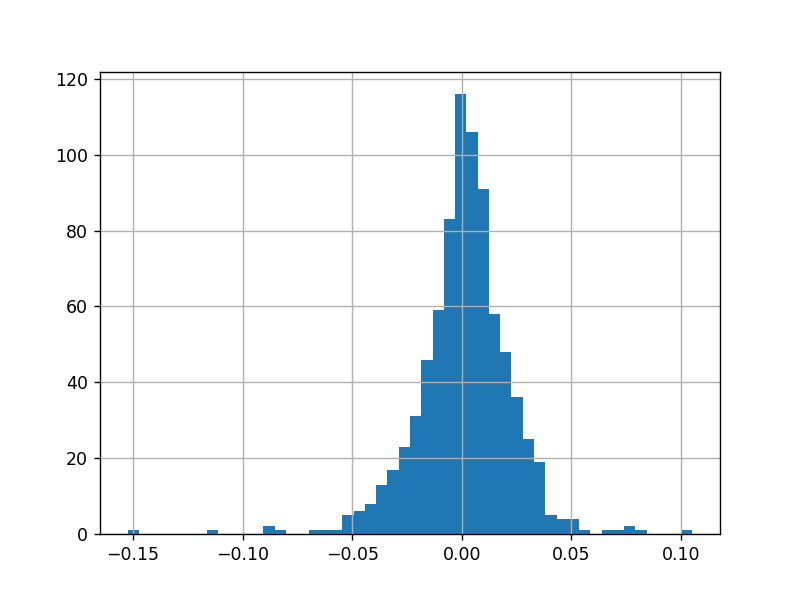

<AxesSubplot:>

In [13]:
fig, ax = plt.subplots()
log_return.hist(bins=50, ax=ax)

In [14]:
log_return.std()

0.021397030275396217

In [15]:
log_return.mean()

0.0010637758370111827

In [16]:
sharpe_ratio = log_return.mean()/log_return.std()

In [17]:
sharpe_ratio

0.04971605046679705

In [18]:
asr = sharpe_ratio*252**.5

In [19]:
asr

0.7892178342208899

In [20]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.42758576, 0.26702617, 0.098296  , 0.20709207])

In [21]:
log_return2 = np.sum(np.log(data/data.shift())*weight, axis=1)

In [22]:
sharpe_ratio2 = log_return2.mean()/log_return2.std()

In [23]:
asr2 = sharpe_ratio2*252**.5

In [24]:
asr2

0.8014931128835227